In [2]:
import pandas as pd

salary_data = pd.read_csv('Salary Prediction of Data Professions.csv')
salary_data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [25]:
# cleaning data by removing missing values
salary_data =  salary_data.dropna()

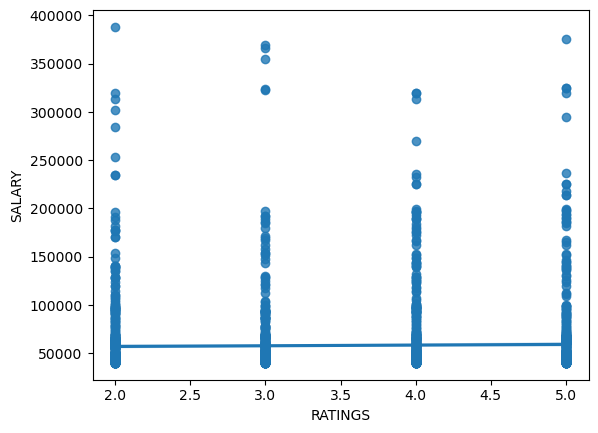

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# The relationship between ratings and salary
sns.regplot(data=salary_data, x='RATINGS', y = 'SALARY')
plt.show()

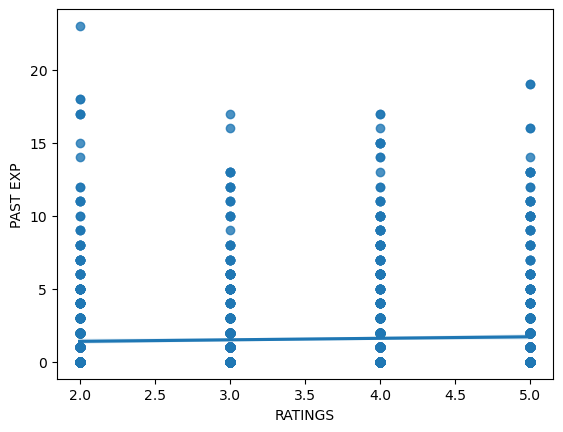

In [27]:
# The relationship between ratings and past_exp
sns.regplot(data=salary_data, x='RATINGS', y = 'PAST EXP')
plt.show()

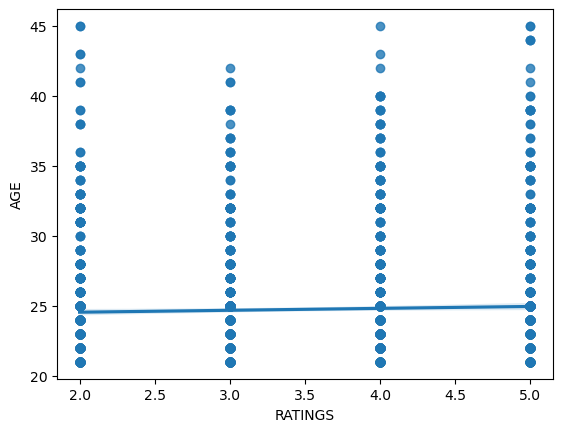

In [28]:
# The relationship between ratings and age
sns.regplot(data=salary_data, x='RATINGS', y = 'AGE')
plt.show()

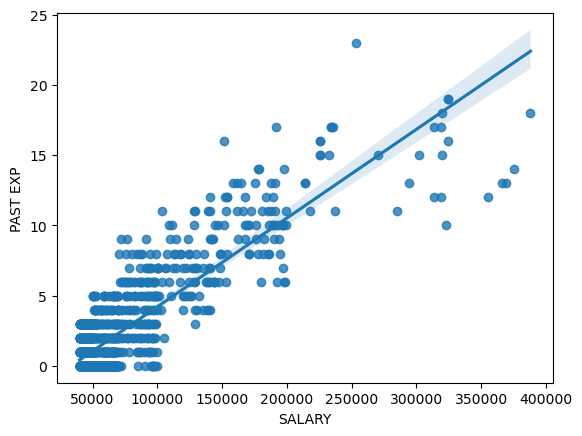

In [29]:
# The relationship between salary and past_exp
sns.regplot(data=salary_data, x='SALARY', y = 'PAST EXP')
plt.show()

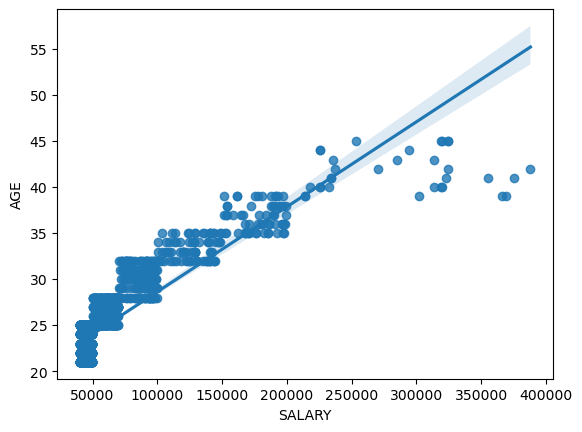

In [30]:
# The relationship between salary and age
sns.regplot(data=salary_data, x='SALARY', y = 'AGE')
plt.show()

In [31]:
print(salary_data.columns.tolist())

['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION', 'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']


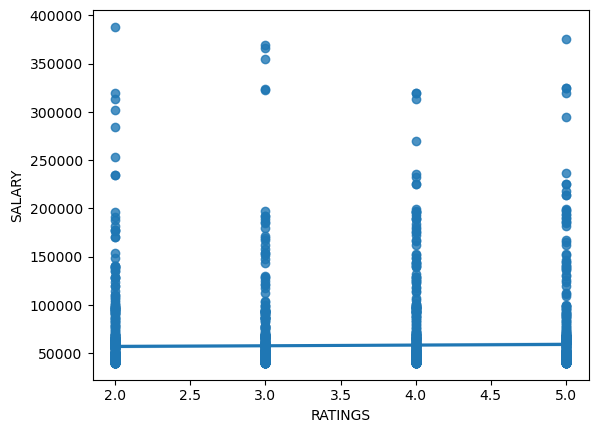

In [32]:
# The relationdhip between age and ratings
sns.regplot(data=salary_data, x='RATINGS', y = 'SALARY')
plt.show()

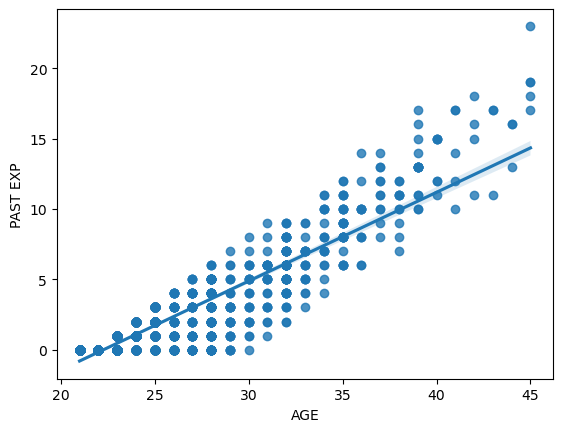

In [33]:
# relationship between leaves remaining an leaves used
sns.regplot(data=salary_data, x='AGE', y = 'PAST EXP')
plt.show()

In [34]:
#Cnverting UNIT and DESIGNATION TO CATEGORY
salary_data['UNIT'] = salary_data['UNIT'].astype('category').cat.codes   
salary_data['DESIGNATION'] = salary_data['DESIGNATION'].astype('category').cat.codes

In [35]:
salary_data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,0,21.0,44570,0,24.0,6.0,2.0,0
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,0,21.0,40955,0,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,0,22.0,45550,1,22.0,8.0,3.0,0
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,0,22.0,40339,3,19.0,11.0,5.0,0
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,4,28.0,63478,4,20.0,10.0,3.0,1


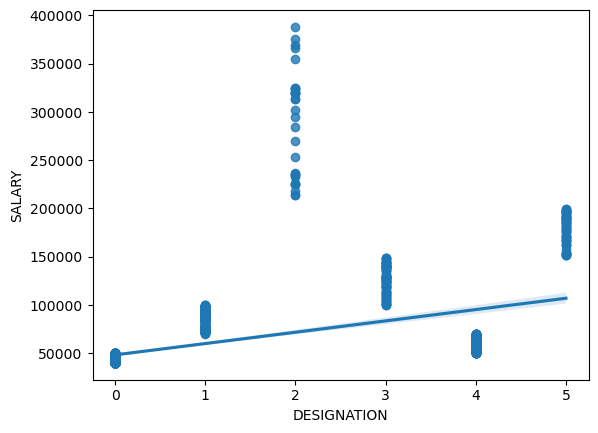

In [38]:
# relationship between UNIT  and DESIGNATION
sns.regplot(data=salary_data, x='DESIGNATION', y='SALARY')
plt.show()

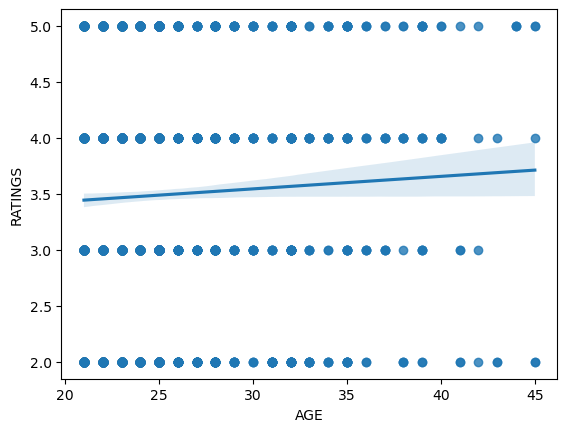

In [41]:
# THE RELATIONSHIP BETWEEN RATING AND SALARY
sns.regplot(data=salary_data, x='AGE', y = 'RATINGS')
plt.show()

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


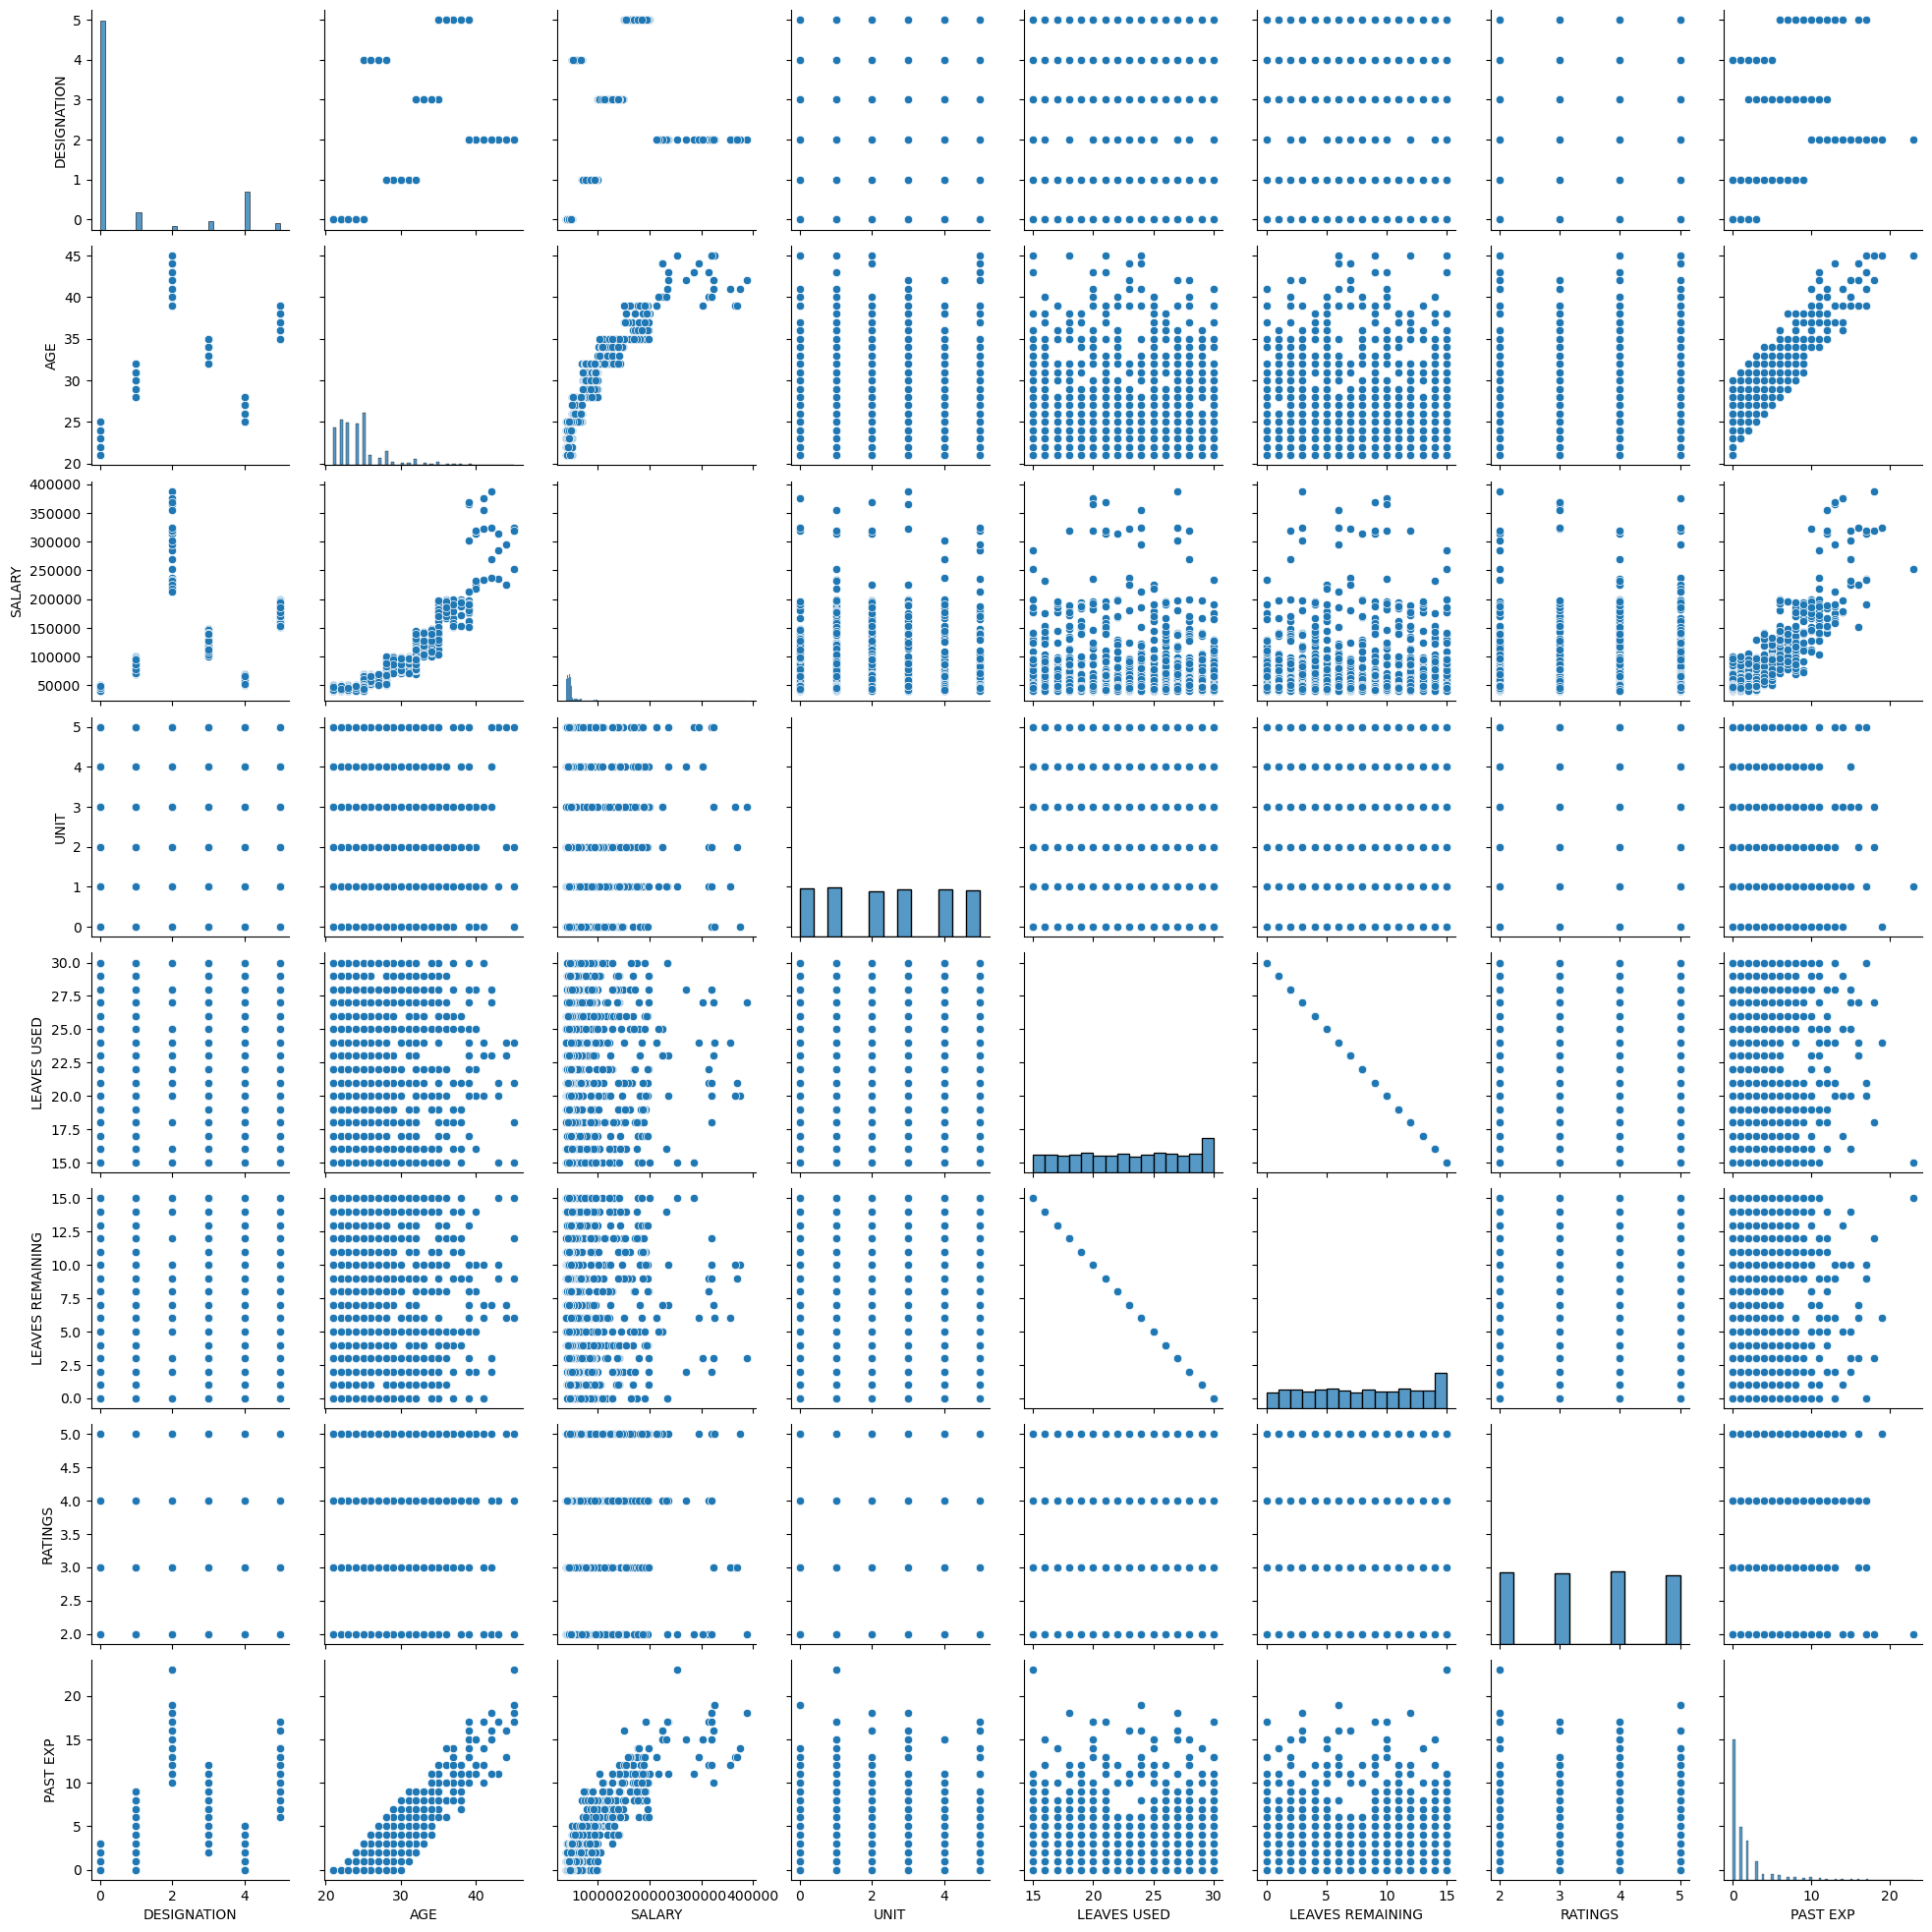

In [45]:
sns.pairplot(salary_data)
plt.show()

In [56]:
# BUILDING A SALARY PREDICTION MODEL USING AGE, SALARY AND PAST EXP
# using multi-linear regression model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [57]:
# Determining the variables
X = salary_data[['AGE', 'PAST EXP']]
y = salary_data['SALARY']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
joblib.dump(lr, 'Salary_Regression_Model.pkl')

y_pred = lr.predict(X_test)
y_pred 

array([ 56806.27455626,  35954.66908536,  97883.32317736,  30585.22713746,
        61549.55418346,  35954.66908536,  35954.66908536,  35954.66908536,
        35954.66908536,  51436.83260836,  30585.22713746, 174667.97847167,
        30585.22713746,  56806.27455626,  46067.39066046,  35954.66908536,
        61549.55418346,  61549.55418346,  51436.83260836,  61549.55418346,
        62175.71650416, 229974.86597439,  61549.55418346, 118108.76632757,
        52062.99492905,  35954.66908536,  30585.22713746,  35954.66908536,
        51436.83260836,  35954.66908536, 107996.04475246,  62175.71650416,
        41324.11103326,  51436.83260836,  51436.83260836,  46067.39066046,
        41324.11103326,  51436.83260836,  35954.66908536,  30585.22713746,
        46693.55298116,  56180.11223556,  77657.88002716,  66292.83381066,
        56180.11223556,  35954.66908536,  35954.66908536,  82401.15965436,
        72914.60039996,  35954.66908536,  61549.55418346,  35954.66908536,
        46693.55298116,  

In [59]:
# Evaluating the performance of the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [60]:
# Outputting the results of the evaluation of the model
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('R2 Score: ', r2)

Mean Squared Error:  213511293.17659238
Mean Absolute Error:  11303.356903659562
R2 Score:  0.8102551290860615
